In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [ ]:
Данные имеют следующую структуру:

- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные

In [8]:
date_list = os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/shared/homeworks/python_ds_miniprojects/4/data')
date_list


['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [ ]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/shared/homeworks/python_ds_miniprojects/4/data'

path

In [12]:
# один путь до одной папки  
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/shared/homeworks/python_ds_miniprojects/4/data'
path = path + '/' + os.listdir(path)[0]  
path

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05'

In [5]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/shared/homeworks/python_ds_miniprojects/4/data'
path

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/shared/homeworks/python_ds_miniprojects/4/data'

In [ ]:
# Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: 
#   колонки из самих файлов (product_id, quantity), 
#   имя пользователя (name), 
#   и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем.

In [5]:
link = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/shared/homeworks/python_ds_miniprojects/4/data'
df_list = []
for path, dirs, files in os.walk(link):
    for file in files:
        if file.endswith('.csv'):
            a = os.path.join(path, file)
            lst = a.split('/')
            date = lst[-3]
            name = lst[-2]
            print(date, name)
            df = pd.read_csv(a)
            df['name'] = name
            df['date'] = date
        df_list.append(df)
df_list        
dff = pd.concat(df_list)       
dff

2020-12-05 Petr_Ivanov
2020-12-05 Petr_Smirnov
2020-12-05 Rostislav_Smirnov
2020-12-05 Kirill_Smirnov
2020-12-05 Alexey_Fedorov
2020-12-05 Alexey_Petrov
2020-12-08 Petr_Petrov
2020-12-08 Rostislav_Petrov
2020-12-08 Kirill_Smirnov
2020-12-08 Alexey_Fedorov
2020-12-08 Anton_Smirnov
2020-12-09 Alexey_Smirnov
2020-12-09 Anton_Petrov
2020-12-09 Rostislav_Petrov
2020-12-09 Anton_Smirnov
2020-12-09 Anton_Ivanov
2020-12-09 Petr_Fedorov
2020-12-09 Vasiliy_Ivanov
2020-12-04 Kirill_Fedorov
2020-12-04 Alexey_Smirnov
2020-12-04 Rostislav_Ivanov
2020-12-04 Petr_Ivanov
2020-12-04 Rostislav_Fedorov
2020-12-04 Petr_Smirnov
2020-12-04 Rostislav_Smirnov
2020-12-04 Petr_Fedorov
2020-12-04 Vasiliy_Ivanov
2020-12-06 Vasiliy_Fedorov
2020-12-03 Alexey_Smirnov
2020-12-03 Anton_Petrov
2020-12-03 Vasiliy_Petrov
2020-12-03 Kirill_Petrov
2020-12-03 Petr_Fedorov
2020-12-03 Vasiliy_Ivanov
2020-12-07 Kirill_Fedorov
2020-12-07 Alexey_Smirnov
2020-12-07 Rostislav_Fedorov
2020-12-07 Alexey_Ivanov
2020-12-07 Petr_Smirnov

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
0,0,18,4,Petr_Fedorov,2020-12-07
1,1,94,4,Petr_Fedorov,2020-12-07
0,0,95,2,Vasiliy_Ivanov,2020-12-07
1,1,83,3,Vasiliy_Ivanov,2020-12-07


In [6]:
dff.reset_index(drop=True)

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [10]:
dff_sum = dff.quantity.sum()
dff_sum

480

In [11]:
# Выясните, какой пользователь купил больше всего товаров.

name_sum_quant = dff.groupby('name', as_index=False).quantity.sum()
name_sum_quant

,name,quantity
0,Alexey_Fedorov,24
1,Alexey_Ivanov,17
2,Alexey_Petrov,7
3,Alexey_Smirnov,52
4,Anton_Ivanov,23
5,Anton_Petrov,18
6,Anton_Smirnov,45
7,Kirill_Fedorov,28
8,Kirill_Petrov,9
9,Kirill_Smirnov,17


In [12]:
names_top = dff.groupby('name', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)
names_top


,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [13]:
#    какой пользователь купил больше всего товаров

names_top.head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [20]:
#    топ-10 товаров по числу проданных единиц за всё время

product_top = dff.groupby('product_id', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)
product_top.head(10)

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


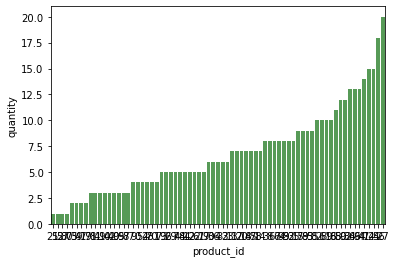

In [26]:
#  барплот, где: по оси x – идентификаторы товаров (product_id), 
#                по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
#  получили диаграмму, с сортировкой по оси х (product_id)

diag_prod = sns.barplot(x='product_id', y='quantity', data=product_top, 
                        order=product_top.sort_values('quantity').product_id, color='green', alpha=0.7)
diag_prod

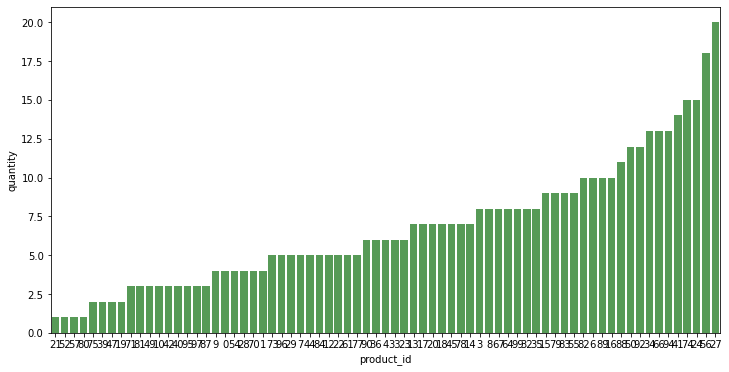

In [28]:
# изменяем размер полученной диаграммы

plt.figure(figsize=(12,6))
sns.barplot(x='product_id', y='quantity', data=product_top, 
                        order=product_top.sort_values('quantity').product_id, color='green', alpha=0.7)
plt.show()

In [14]:
#   сколько было продано единиц товара с product_id равным 56

product_top.query("product_id==56")

,product_id,quantity
42,56,18


In [35]:
#  продажи по дням  
date_quant = dff.groupby('date', as_index=False).agg({'quantity': 'sum'})
date_quant

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


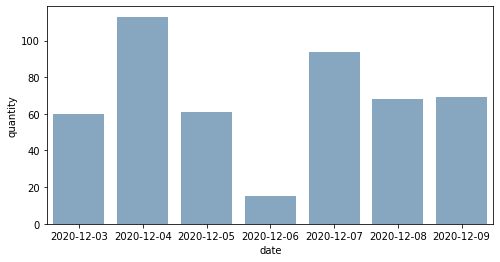

In [38]:
#   барплот, по оси x - дни, по которым у нас есть данные (date)

plt.figure(figsize=(8,4))
sns.barplot(x='date', y='quantity', data=date_quant, 
            color='steelblue', alpha=0.7)
plt.show()

In [47]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

dupl = dff.drop_duplicates(subset=['product_id', 'name', 'date']) 
dupl    
# удаляем дубликаты по имени, продукту и дате
# Это оставит только по одной строке на каждую покупку продукта в день.

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
0,0,18,4,Petr_Fedorov,2020-12-07
1,1,94,4,Petr_Fedorov,2020-12-07
0,0,95,2,Vasiliy_Ivanov,2020-12-07
1,1,83,3,Vasiliy_Ivanov,2020-12-07


In [46]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 

# группируем по колонкам name и product_id 
# и считаем число дней покупок каждого продукта для каждого человека (то есть число строк в группе)
# затем выбираем строки со значением больше 1, то есть только строки пользователей, купивших что-то в разные дни

d2 = dupl.groupby(['name', 'product_id']).agg({'date': 'count'}, as_index=False)
d2.query("date>1")

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
